In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random

In [4]:
np.random.seed(42)
num_records = 1000
departments = ['IT', 'HR', 'Finance', 'Marketing', 'Sales']
job_roles = {
    'IT': ['Software Engineer', 'Data Scientist', 'System Admin', 'DevOps Engineer'],
    'HR': ['HR Manager', 'Recruiter', 'HR Assistant'],
    'Finance': ['Accountant', 'Financial Analyst', 'Auditor'],
    'Marketing': ['Marketing Manager', 'SEO Specialist', 'Content Creator'],
    'Sales': ['Sales Executive', 'Account Manager', 'Sales Representative']
}
data = []
for i in range(1, num_records + 1):
    dept = random.choice(departments)
    role = random.choice(job_roles[dept])
    age = np.random.randint(22, 60)
    exp = np.random.randint(0, age - 21)
    base_salary = {
        'IT': np.random.randint(3000, 8000),
        'HR': np.random.randint(2500, 6000),
        'Finance': np.random.randint(2800, 7000),
        'Marketing': np.random.randint(2700, 6500),
        'Sales': np.random.randint(2500, 7500)
    }[dept]
    salary = base_salary + exp * np.random.randint(50, 200)
    data.append([i, age, dept, role, exp, salary])
df = pd.DataFrame(data, columns=['EmployeeID', 'Age', 'Department', 'JobRole', 'ExperienceYears', 'Salary'])
df.head()

,EmployeeID,Age,Department,JobRole,ExperienceYears,Salary
0,1,50,Marketing,Content Creator,14,5856
1,2,57,IT,System Admin,23,4740
2,3,54,Marketing,SEO Specialist,11,7520
3,4,49,HR,HR Manager,27,7006
4,5,24,HR,HR Assistant,0,3146


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   EmployeeID       1000 non-null   int64 
 1   Age              1000 non-null   int64 
 2   Department       1000 non-null   object
 3   JobRole          1000 non-null   object
 4   ExperienceYears  1000 non-null   int64 
 5   Salary           1000 non-null   int64 
dtypes: int64(4), object(2)
memory usage: 47.0+ KB


In [6]:
df.describe()

,EmployeeID,Age,ExperienceYears,Salary
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,40.235000,9.280000,5967.552000
std,288.819436,11.036284,8.528443,1751.011193
min,1.000000,22.000000,0.000000,2618.000000
25%,250.750000,31.000000,2.000000,4641.000000
50%,500.500000,40.000000,7.000000,5847.500000
75%,750.250000,50.000000,15.000000,7101.250000
max,1000.000000,59.000000,36.000000,12384.000000


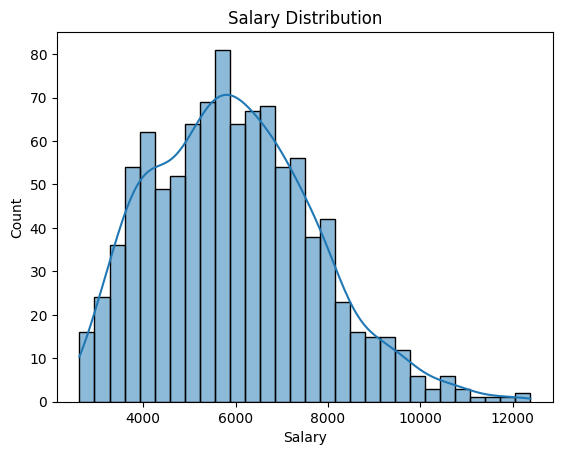

In [7]:
sns.histplot(df['Salary'], bins=30, kde=True)
plt.title('Salary Distribution')
plt.show()

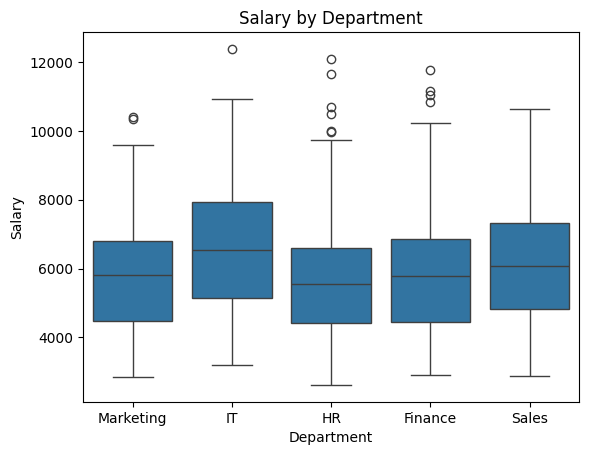

In [8]:
sns.boxplot(x='Department', y='Salary', data=df)
plt.title('Salary by Department')
plt.show()

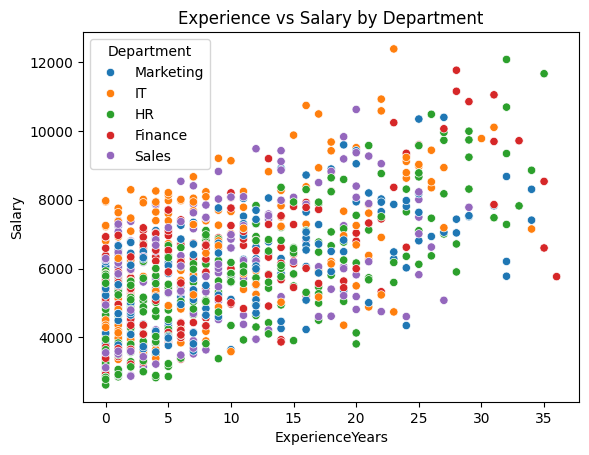

In [9]:
sns.scatterplot(x='ExperienceYears', y='Salary', hue='Department', data=df)
plt.title('Experience vs Salary by Department')
plt.show()

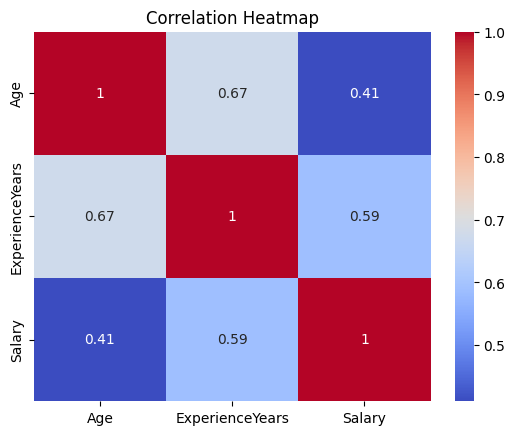

In [11]:
corr = df[['Age','ExperienceYears','Salary']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

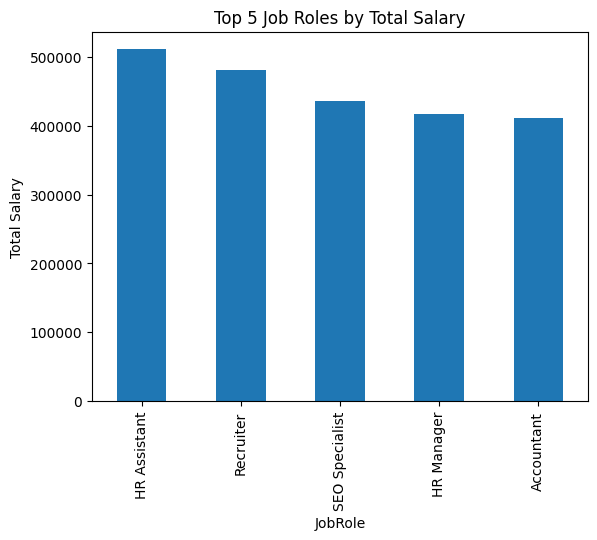

In [13]:
df.groupby('JobRole')['Salary'].sum().sort_values(ascending=False).head(5).plot(kind='bar')
plt.title('Top 5 Job Roles by Total Salary')
plt.ylabel('Total Salary')
plt.show()

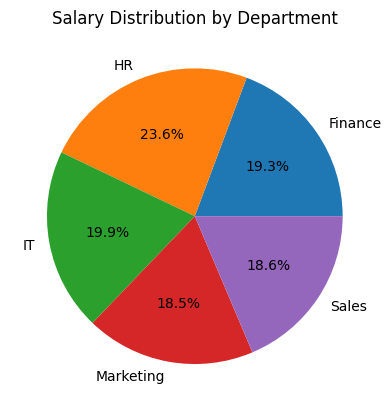

In [14]:
df.groupby('Department')['Salary'].sum().plot(kind='pie', autopct='%1.1f%%')
plt.title('Salary Distribution by Department')
plt.ylabel('')
plt.show()

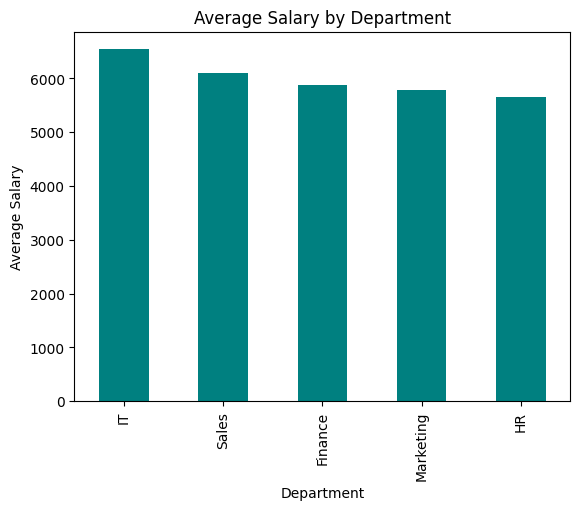

In [15]:
df.groupby('Department')['Salary'].mean().sort_values(ascending=False).plot(kind='bar', color='teal')
plt.title('Average Salary by Department')
plt.ylabel('Average Salary')
plt.show()


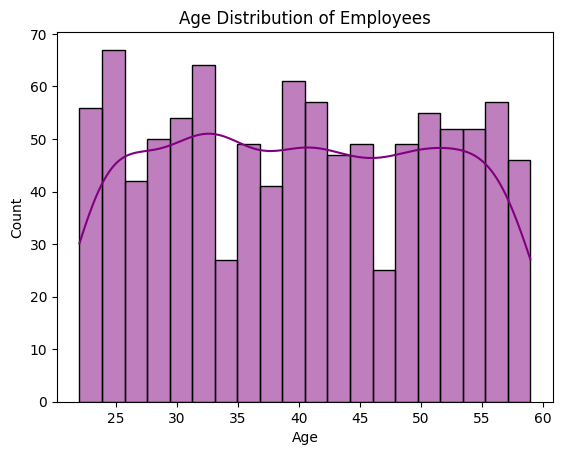

In [16]:
sns.histplot(df['Age'], bins=20, kde=True, color='purple')
plt.title('Age Distribution of Employees')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

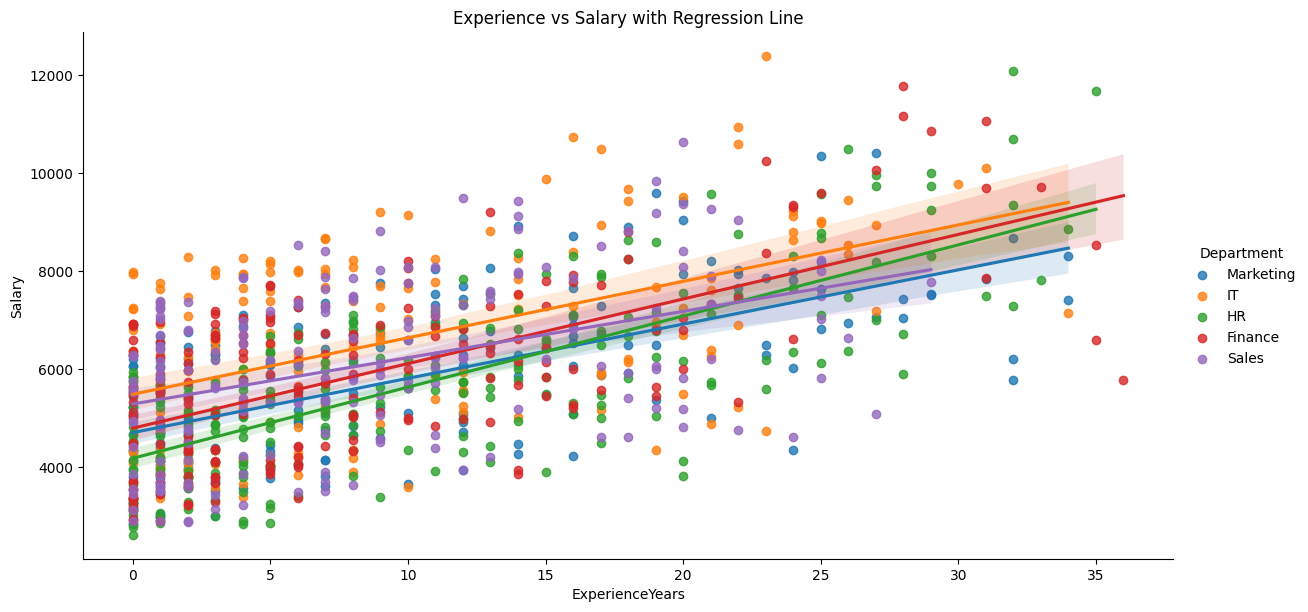

In [17]:
sns.lmplot(x='ExperienceYears', y='Salary', data=df, hue='Department', aspect=2, height=6)
plt.title('Experience vs Salary with Regression Line')
plt.show()

In [18]:
top_earners = df.nlargest(10, 'Salary')[['EmployeeID', 'JobRole', 'Department', 'Salary']]
print(top_earners)

     EmployeeID            JobRole Department  Salary
159         160     Data Scientist         IT   12384
59           60         HR Manager         HR   12078
456         457  Financial Analyst    Finance   11765
943         944       HR Assistant         HR   11664
661         662            Auditor    Finance   11153
940         941            Auditor    Finance   11050
889         890  Software Engineer         IT   10925
457         458  Financial Analyst    Finance   10852
883         884       System Admin         IT   10741
349         350       HR Assistant         HR   10692


In [19]:
df.groupby('JobRole')[['Age','ExperienceYears']].mean().sort_values('Age', ascending=False).head(10)

,Age,ExperienceYears
JobRole,,
Data Scientist,42.820513,10.333333
HR Assistant,41.633333,10.611111
HR Manager,41.506667,9.493333
Content Creator,41.326923,11.096154
Auditor,41.235294,9.352941
Recruiter,40.523810,10.345238
System Admin,39.981818,8.527273
Financial Analyst,39.913793,7.017241
Sales Executive,39.823529,7.926471


C:\Users\TAG\AppData\Local\Temp\ipykernel_17560\3968873926.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('ExperienceGroup')['Salary'].mean().plot(kind='bar', color='orange')


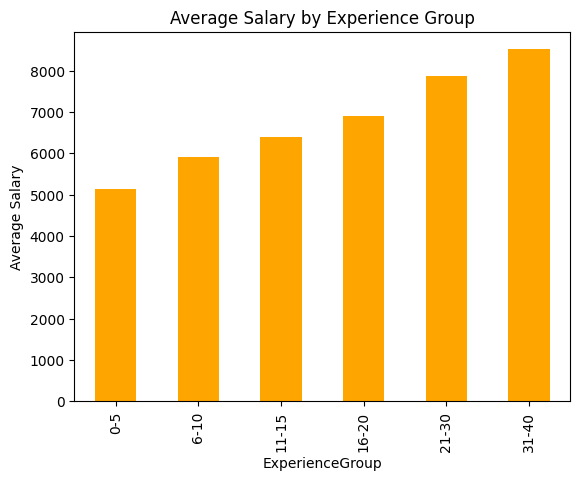

In [20]:
df['ExperienceGroup'] = pd.cut(df['ExperienceYears'], bins=[0,5,10,15,20,30,40], labels=['0-5','6-10','11-15','16-20','21-30','31-40'])
df.groupby('ExperienceGroup')['Salary'].mean().plot(kind='bar', color='orange')
plt.title('Average Salary by Experience Group')
plt.ylabel('Average Salary')
plt.show()


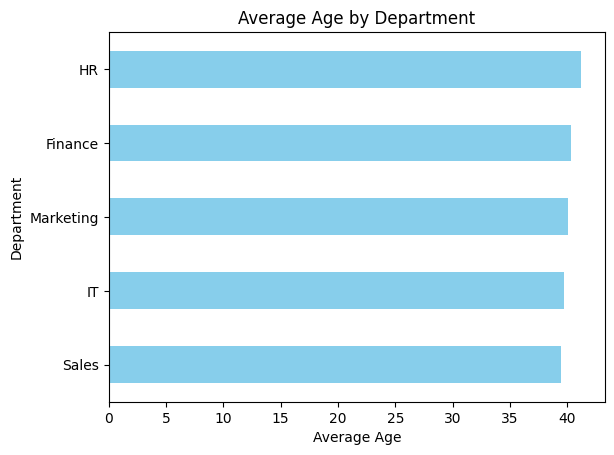

In [21]:
df.groupby('Department')['Age'].mean().sort_values().plot(kind='barh', color='skyblue')
plt.title('Average Age by Department')
plt.xlabel('Average Age')
plt.show()


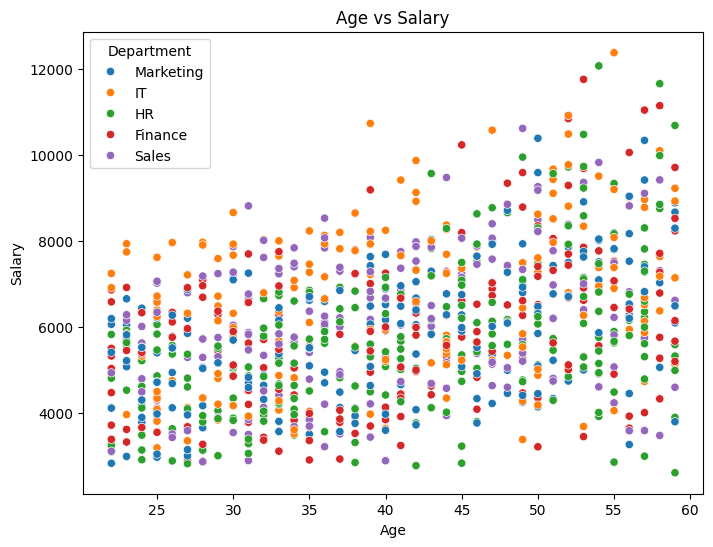

In [23]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='Age', y='Salary', data=df, hue='Department')
plt.title('Age vs Salary')
plt.show()


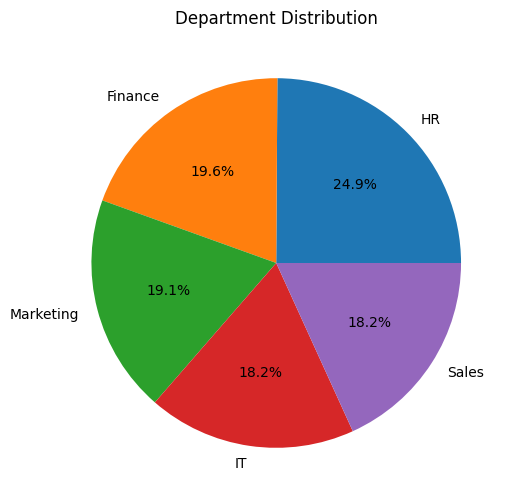

In [24]:
df['Department'].value_counts().plot(kind='pie', autopct='%1.1f%%', figsize=(6,6))
plt.title('Department Distribution')
plt.ylabel('')
plt.show()


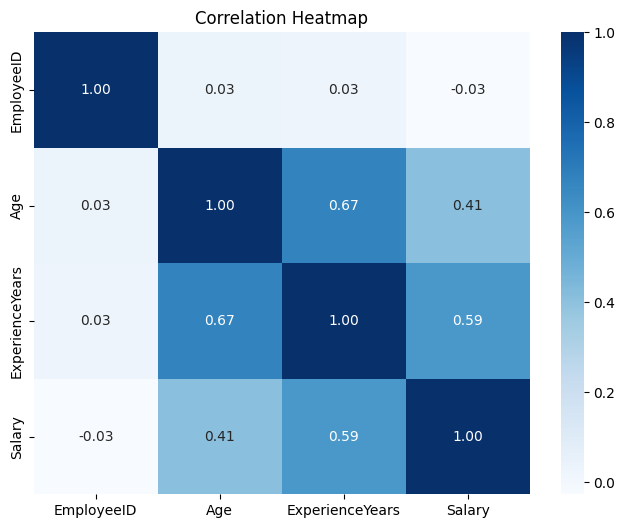

In [27]:
plt.figure(figsize=(8,6))
sns.heatmap(df.select_dtypes(include='number').corr(), annot=True, cmap='Blues', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

In [28]:
df.nlargest(10, 'ExperienceYears')[['EmployeeID', 'JobRole', 'Department', 'ExperienceYears']]

,EmployeeID,JobRole,Department,ExperienceYears
178,179,Auditor,Finance,36
367,368,Accountant,Finance,35
482,483,Accountant,Finance,35
943,944,HR Assistant,HR,35
105,106,DevOps Engineer,IT,34
392,393,SEO Specialist,Marketing,34
897,898,Recruiter,HR,34
909,910,SEO Specialist,Marketing,34
478,479,Recruiter,HR,33
696,697,Accountant,Finance,33


C:\Users\TAG\AppData\Local\Temp\ipykernel_17560\2163404960.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='JobRole', data=df, order=df['JobRole'].value_counts().index, palette='viridis')


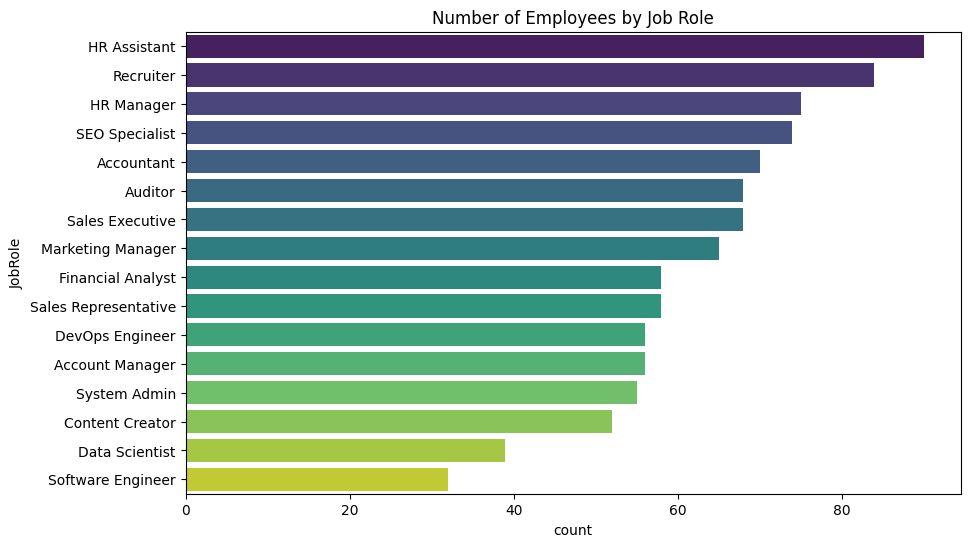

In [29]:
plt.figure(figsize=(10,6))
sns.countplot(y='JobRole', data=df, order=df['JobRole'].value_counts().index, palette='viridis')
plt.title('Number of Employees by Job Role')
plt.show()
